<a href="https://colab.research.google.com/github/RyuJungSoo/2022_winter_ai_study/blob/main/%EC%99%80%EC%9D%B8%EC%9D%98_%EC%A2%85%EB%A5%98_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0_%EA%B7%B8%EB%9E%98%ED%94%84_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

In [12]:
# 데이터 입력
df_pre = pd.read_csv('../dataset/wine.csv', header = None)
df = df_pre.sample(frac=0.15) # 원본 데이터의 15%를 랜덤으로 불러오기


In [13]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [14]:
# 모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics =['accuracy'])

In [16]:
# 모델 저장 폴더 설정
MODEL_DIR = '../model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [17]:
# 모델 저장 조건 설정
modelpath = "../model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [18]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs = 3500, batch_size = 500, callbacks=[checkpointer]) # 사용할 데이터의 33%는 테스트셋으로 쓰고 나머지는 학습셋으로 사용

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 2251/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0128 - accuracy: 0.9980
Epoch 02251: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.1154 - val_accuracy: 0.9845
Epoch 2252/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - accuracy: 1.0000
Epoch 02252: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.1204 - val_accuracy: 0.9814
Epoch 2253/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0162 - accuracy: 0.9960
Epoch 02253: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.1158 - val_accuracy: 0.9783
Epoch 2254/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0168 - accuracy: 0.9960
Epoch 02254: val_loss did not improve f

In [19]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

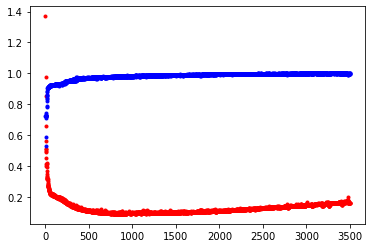

In [20]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc)) # 에포크 값
plt.plot(x_len, y_vloss, "o", c="red", markersize = 3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()